In [73]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from urllib.request import urlopen
from PIL import Image

%matplotlib inline
plt.style.use('default')

print("TF  Version",tf.__version__)


TF  Version 2.8.0


In [74]:
#Zugang zu eigenem Google Drive ermöglichen
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [75]:
#Import und unzippen des ZipFile
import os
import zipfile

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/fruits-360_dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [76]:
TRAINING_DIR = "../content/fruits-360/Training"
TEST_DIR = "../content/fruits-360/Test"

In [77]:
# The pretrained VGG16 network need quite some memory, 
# make sure you have enough memory allocated for docker if you are running this notebook locally

model_vgg=tf.keras.applications.vgg16.VGG16(include_top=True, weights='imagenet')

In [78]:
model_vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [79]:
def preprocess_input(img):
  x=np.zeros((224,224,3),dtype="float32")
  x[:,:,0]=img[:,:,2]
  x[:,:,1]=img[:,:,1]
  x[:,:,2]=img[:,:,0]
  mean = [103.939, 116.779, 123.68]
  x[:,:, 0] = x[:,:, 0]-mean[0]
  x[:,:, 1] = x[:,:, 1]-mean[1]
  x[:,:, 2] = x[:,:, 2]-mean[2]
  return x 

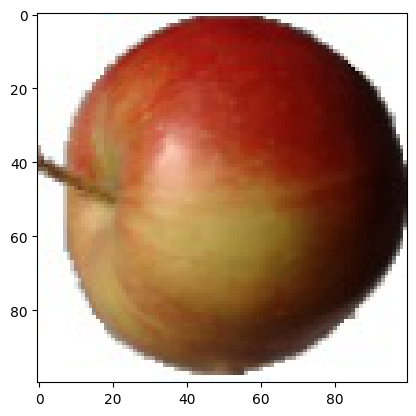

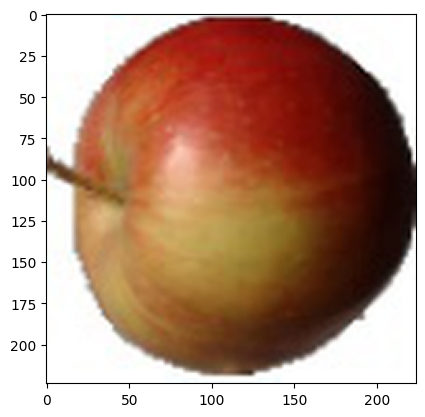

In [80]:
img1 =(Image.open("../content/fruits-360/Training/Apple Red 2/r_0_100.jpg"))
plt.imshow(img1)
plt.show()
new_width  = 224
new_height = 224
img1 = img1.resize((new_width, new_height), Image.ANTIALIAS)
plt.imshow(img1)
plt.show()
img1=np.array(img1)

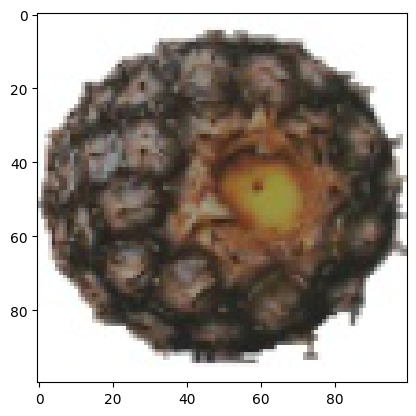

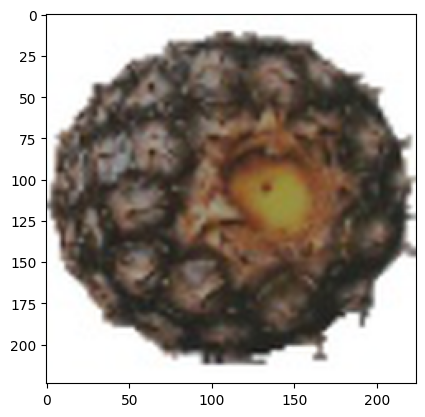

In [81]:
img2 =(Image.open("../content/fruits-360/Training/Pineapple/r_162_100.jpg"))
plt.imshow(img2)
plt.show()
new_width  = 224
new_height = 224
img2 = img2.resize((new_width, new_height), Image.ANTIALIAS)
plt.imshow(img2)
plt.show()
img2=np.array(img2)

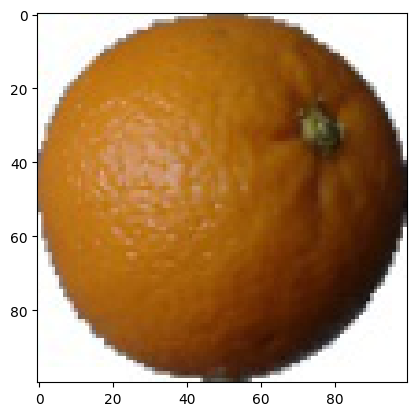

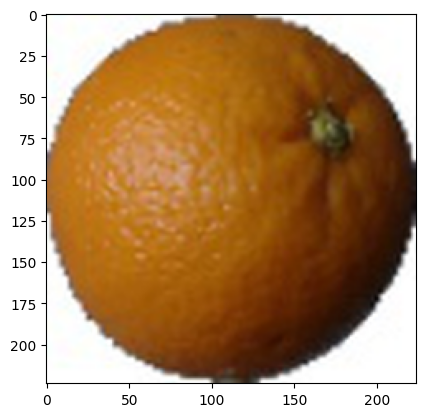

In [82]:
img3 =(Image.open("../content/fruits-360/Training/Orange/r_143_100.jpg"))
plt.imshow(img3)
plt.show()
new_width  = 224
new_height = 224
img3 = img3.resize((new_width, new_height), Image.ANTIALIAS)
plt.imshow(img3)
plt.show()
img3=np.array(img3)

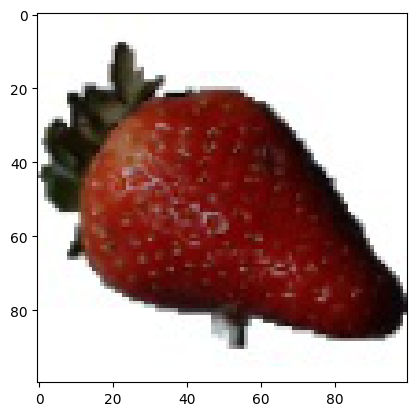

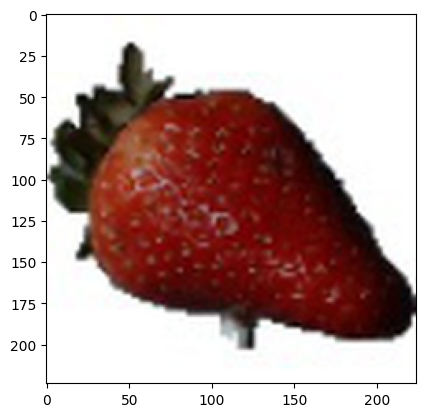

In [83]:
img4 =(Image.open("../content/fruits-360/Training/Strawberry/r_244_100.jpg"))
plt.imshow(img4)
plt.show()
new_width  = 224
new_height = 224
img4 = img4.resize((new_width, new_height), Image.ANTIALIAS)
plt.imshow(img4)
plt.show()
img4=np.array(img4)

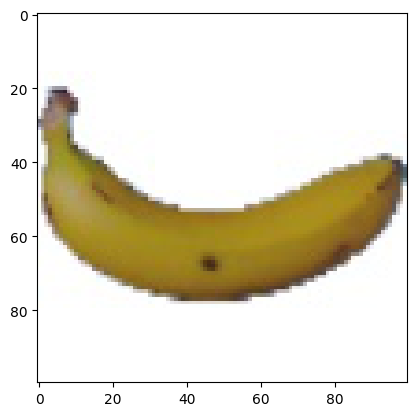

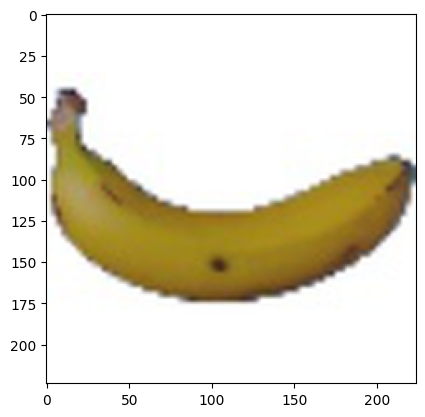

In [84]:
img5 =(Image.open("../content/fruits-360/Training/Banana/84_100.jpg"))
plt.imshow(img5)
plt.show()
new_width  = 224
new_height = 224
img5 = img5.resize((new_width, new_height), Image.ANTIALIAS)
plt.imshow(img5)
plt.show()
img5=np.array(img5)

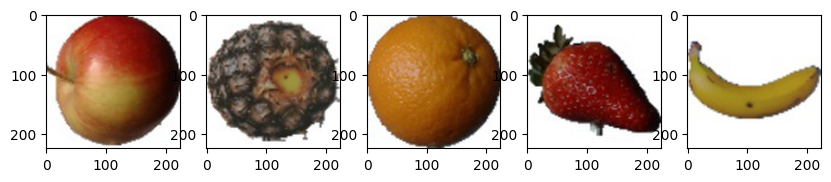

In [85]:
plt.figure(figsize=(10,10))
plt.subplot(1,5,1)
plt.imshow(img1)
plt.subplot(1,5,2)
plt.imshow(img2)
plt.subplot(1,5,3)
plt.imshow(img3)
plt.subplot(1,5,4)
plt.imshow(img4)
plt.subplot(1,5,5)
plt.imshow(img5)

In [86]:
img1=preprocess_input(img1)
print(img1.shape)
img2=preprocess_input(img2)
print(img2.shape)
img3=preprocess_input(img3)
print(img3.shape)
img4=preprocess_input(img4)
print(img4.shape)
img5=preprocess_input(img5)
print(img5.shape)

(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


In [94]:
pred1=model_vgg.predict(np.expand_dims(img1,axis=0))
tf.keras.applications.vgg16.decode_predictions(pred1)

[[('n03134739', 'croquet_ball', 0.4264004),
  ('n03720891', 'maraca', 0.3356729),
  ('n12768682', 'buckeye', 0.09184255),
  ('n12267677', 'acorn', 0.063574836),
  ('n07742313', 'Granny_Smith', 0.044215385)]]

In [95]:
pred2=model_vgg.predict(np.expand_dims(img2,axis=0))
tf.keras.applications.vgg16.decode_predictions(pred2)

[[('n12768682', 'buckeye', 0.35958377),
  ('n12267677', 'acorn', 0.3506412),
  ('n13052670', 'hen-of-the-woods', 0.1408705),
  ('n07753275', 'pineapple', 0.06873885),
  ('n07760859', 'custard_apple', 0.030442119)]]

In [89]:
pred3=model_vgg.predict(np.expand_dims(img3,axis=0))
tf.keras.applications.vgg16.decode_predictions(pred3)

[[('n07747607', 'orange', 0.8481453),
  ('n07749582', 'lemon', 0.14380422),
  ('n07742313', 'Granny_Smith', 0.001831102),
  ('n07753592', 'banana', 0.0012129848),
  ('n07684084', 'French_loaf', 0.0010300735)]]

In [90]:
pred4=model_vgg.predict(np.expand_dims(img4,axis=0))
tf.keras.applications.vgg16.decode_predictions(pred4)

[[('n07745940', 'strawberry', 0.98684967),
  ('n12620546', 'hip', 0.0017366698),
  ('n03720891', 'maraca', 0.0010359043),
  ('n03729826', 'matchstick', 0.00089072634),
  ('n07579787', 'plate', 0.0006446182)]]

In [91]:
pred5=model_vgg.predict(np.expand_dims(img5,axis=0))
tf.keras.applications.vgg16.decode_predictions(pred5)

[[('n07753592', 'banana', 0.85032374),
  ('n03495258', 'harp', 0.041748635),
  ('n03532672', 'hook', 0.022975475),
  ('n03047690', 'clog', 0.009548296),
  ('n01930112', 'nematode', 0.009439148)]]